<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns = {'Valeur':'Population'}, inplace = True)


In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [9]:
# Statistique descriptive de la colonne Population
population["Population"].describe().reset_index()

,index,Population
0,count,1.416000e+03
1,mean,3.144793e+07
2,std,1.300812e+08
3,min,7.930000e+02
4,25%,3.783410e+05
5,50%,5.126480e+06
6,75%,1.930666e+07
7,max,1.427648e+09


In [10]:
# Le pays qui a la plus petite population
population[population["Population"]== population["Population"].min()]

,Zone,Année,Population
1174,Saint-Siège,2017,793.0


In [11]:
# le pays qui a la plus grande population
population[population["Population"]== population["Population"].max()]

,Zone,Année,Population
263,"Chine, continentale",2018,1.427648e+09


In [12]:
# Afficher les differentes années avec le nombre d'observation recensé
population["Année"].value_counts().reset_index()

,Année,count
0,2013,236
1,2014,236
2,2015,236
3,2016,236
4,2017,236
5,2018,236


In [13]:
# Afficher les differentes zone avec le nombre d'observation 
population["Zone"].value_counts().reset_index()

,Zone,count
0,Afghanistan,6
1,Palestine,6
2,Nicaragua,6
3,Niger,6
4,Nigéria,6
...,...,...
231,Guinée,6
232,Guinée équatoriale,6
233,Guinée-Bissau,6
234,Guyana,6


En résumé, le dataframe population contient 1416 observations(lignes) et 3 colonnes à savoir; le Zone, Année et Valeur(Population)
- La Zone correspond aux differentes pays ou région du monde ayant participé à l'étude, ils sont au nombre de 236. 
- Chaque observation correspond à la valeur de la population de chaque pays pour chaque année allant de 2013 à 2018, ce qui fait un total de 6 observation par pays. 
- Saint-Siège est la zone qui a la plus petite population, soit 793 personnes en 2017.
- La chine, contienetale est composé de 1427647785 habitants en 2018, soit la zone avec la plus grande population.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le fichier disponibilité alimentaire contient {} lignes".format(dispo_alimentaire.shape[0]))
print("Le fichier disponibilité alimentaire contient {} colones".format(dispo_alimentaire.shape[1]))

Le fichier disponibilité alimentaire contient 15605 lignes
Le fichier disponibilité alimentaire contient 18 colones


In [15]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [16]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [17]:
#remplacement des NaN dans le dataset par des 0
#dispo_alimentaire = dispo_alimentaire.fillna(0)

dispo_alimentaire.fillna(0, inplace=True)
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Verifier s'il existe une colonne avec des données manquantes
dispo_alimentaire.isnull().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

In [19]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [20]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
cls_Mtonne = ['Aliments pour animaux','Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock']


In [21]:
for col in cls_Mtonne:
    dispo_alimentaire[col] = dispo_alimentaire[col]*1000000
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [23]:
dispo_alimentaire["Zone"].value_counts().reset_index()

,Zone,count
0,Inde,97
1,Japon,97
2,République-Unie de Tanzanie,96
3,Brésil,96
4,Indonésie,96
...,...,...
169,Timor-Leste,61
170,République populaire démocratique de Corée,61
171,Afghanistan,60
172,Turkménistan,57


utilisations/moyens d’acquisition de la
 disponibilité alimentaire

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [28]:
#Afficher les dimensions du dataset
print("Le dataframe aide alimentaire comporte {} observations/lignes".format(aide_alimentaire.shape[0]))
print("Le dataframe aide alimentaire comporte {} colonnes".format(aide_alimentaire.shape[1]))

Le dataframe aide alimentaire comporte 1475 observations/lignes
Le dataframe aide alimentaire comporte 4 colonnes


In [29]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [30]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [31]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns = {"Pays bénéficiaire": "Zone"})
aide_alimentaire

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [32]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Valeur"] = aide_alimentaire["Valeur"]*1000

In [33]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [34]:
# Affichage des differentes pays avec leur nombre d'observation
aide_alimentaire["Zone"].value_counts().reset_index()

,Zone,count
0,Algérie,39
1,Yémen,38
2,République arabe syrienne,38
3,Éthiopie,33
4,Nicaragua,33
...,...,...
71,Angola,4
72,Zambie,4
73,Comores,2
74,Égypte,2


In [35]:
#Afficher les differentes années d'étude de ce dataframe
aide_alimentaire["Année"].value_counts().reset_index()

,Année,count
0,2013,519
1,2014,461
2,2015,391
3,2016,104


In [36]:
aide_alimentaire["Produit"].value_counts().reset_index()

,Produit,count
0,Non-céréales,220
1,Céréales,200
2,Huiles végétales,179
3,"Légumineuses Sèches,Tot.",171
4,"Riz, total",147
5,Mélanges et préparations,142
6,Autres non-céréales,120
7,"Sucre, total",67
8,Céréales Secondaires,61
9,Blé et Farin,58


In [37]:
# Afficher le pays où l'aide alimentaire est élevé
aide_alimentaire[aide_alimentaire["Valeur"]==aide_alimentaire["Valeur"].max()]

,Zone,Année,Produit,Valeur
363,Éthiopie,2014,Céréales,265013000


In [38]:
# Afficher le ou les pays où aucune aide n'a été reçu
aide_alimentaire[aide_alimentaire["Valeur"]==aide_alimentaire["Valeur"].min()]

,Zone,Année,Produit,Valeur
219,"Chine, continentale",2014,Huiles végétales,0
220,"Chine, continentale",2014,Non-céréales,0
1338,Sri Lanka,2015,"Sucre, total",0
1362,Tadjikistan,2015,"Lait, total",0
1368,Tadjikistan,2015,Non-céréales,0
1386,Tchad,2013,"Lait, total",0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [39]:
#Afficher les dimensions du dataset
print("Le dataframe Sous Nutrition contient {} lignes (ou observations)".format(sous_nutrition.shape[0]))
print("Le dataframe Sous Nutrition contient {}colonnes".format(sous_nutrition.shape[1]))

Le dataframe Sous Nutrition contient 1218 lignes (ou observations)
Le dataframe Sous Nutrition contient 3colonnes


In [40]:
#Consulter le nombre de colonnes
print(sous_nutrition.columns)
sous_nutrition.info()

Index(['Zone', 'Année', 'Valeur'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [41]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [42]:
#Conversion de la colonne sous nutrition en numérique
#sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [43]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition['Valeur'].fillna(0, inplace = True)

In [44]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})


In [45]:
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [46]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition']*1000000

In [47]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [48]:
# J'ajoute ceci 
# La colonne Annee est de type objet 
#nous devons utiliser la moyenne des années
# def calculate_year_mean(annee):
#     return int(annee.split('-'))[0])+ 1
# # Apply this function to column annee
# sous_nutrition['Année'] = sous_nutrition['Année'].apply(calculate_year_mean).astype(int)
sous_nutrition['Année'] = sous_nutrition['Année'].apply(lambda x: int(x.split("-")[0])+1)
sous_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [49]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_sousnutri = population.merge(sous_nutrition, on=['Année', 'Zone'], how='inner')

population_sousnutri = population_sousnutri[population_sousnutri['Année'] == 2017]

In [50]:
#Affichage du dataset
population_sousnutri.head()

,Zone,Année,Population,sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0
10,Afrique du Sud,2017,57009756.0,3100000.0
16,Albanie,2017,2884169.0,100000.0
22,Algérie,2017,41389189.0,1300000.0
28,Allemagne,2017,82658409.0,0.0


In [51]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nbr_population_sousnutri = population_sousnutri['sous_nutrition'].sum()
proportion = round(nbr_population_sousnutri/population_sousnutri['Population'].sum()*100, 2)
print(f'Le nombre de personne en état de sous nutrition est égale à {nbr_population_sousnutri} soit {proportion} % de la population.')

Le nombre de personne en état de sous nutrition est égale à 535700000.0 soit 7.1 % de la population.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [52]:
#Combien mange en moyenne un être humain ? Source => 
# Selon mes recherches sur google, en moyenne une personne consomme 2350 cal par jour

In [53]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
pop_dispoalimentaire = population[population['Année']==2017].merge(dispo_alimentaire, on= 'Zone', how = 'inner')


In [54]:
#Affichage du nouveau dataframe
pop_dispoalimentaire.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
pop_dispoalimentaire['dispo_kcal'] = pop_dispoalimentaire['Disponibilité alimentaire (Kcal/personne/jour)']*pop_dispoalimentaire['Population']
pop_dispoalimentaire.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0


In [56]:
#Calcul du nombre d'humains pouvant être nourris
nbre_pers = round(pop_dispoalimentaire['dispo_kcal'].sum()/2350)
print(f'Le nombre de personnes pouvant etre nouris en 2017 est de {nbre_pers}')

Le nombre de personnes pouvant etre nouris en 2017 est de 8901695586


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [57]:
#Transfert des données avec les végétaux dans un nouveau dataframe
pop_vegetale = pop_dispoalimentaire[pop_dispoalimentaire['Origine']=='vegetale']
pop_vegetale.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#Calcul du nombre de kcal disponible pour les végétaux
nbre_kcal_veg = pop_vegetale['dispo_kcal'].sum()
print(f'Le nombre de Kcal disponible pour les végétaux est de {nbre_kcal_veg}')

Le nombre de Kcal disponible pour les végétaux est de 17260764211501.0


In [59]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nbre_humains = round(nbre_kcal_veg/2350)
print(f"Le nombre d'humains pouvant etre nouris avec les produits végétaux sont {nbre_humains}")

Le nombre d'humains pouvant etre nouris avec les produits végétaux sont 7345006047


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [60]:
#Calcul de la disponibilité totale
Tdispo_int = pop_dispoalimentaire['Disponibilité intérieure'].sum()
Tdispo_int

9733927000000.0

In [61]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for col in ["Aliments pour animaux","Nourriture","Pertes"]:
    d = pop_dispoalimentaire[col].sum()
    r = np.round(d/Tdispo_int*100,2)
    print(f" La disponibilité {col} est de {d} soit {r} %")

 La disponibilité Aliments pour animaux est de 1288002000000.0 soit 13.23 %
 La disponibilité Nourriture est de 4805525000000.0 soit 49.37 %
 La disponibilité Pertes est de 452283000000.0 soit 4.65 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [62]:
#Création d'une liste avec toutes les variables
dispo_alimentaire["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [63]:
Cereales = ["Blé", 'Céréales, Autres', 'Maïs', 'Millet', 'Seigle', 'Orge','Sorgho', 'Avoine', 'Riz (Eq Blanchi)']

In [64]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
DF_Cereales = pop_dispoalimentaire[pop_dispoalimentaire["Produit"].isin(Cereales)]
DF_Cereales


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,...,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,4.968938e+10
12,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,...,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,7.622184e+08
34,Afghanistan,2017,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,...,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,1.088883e+08
40,Afghanistan,2017,36296113.0,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,...,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,9.436989e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,Zimbabwe,2017,14236595.0,Millet,vegetale,0.0,0.0,23.0,2.93,0.20,...,5.500000e+07,0.0,0.000000e+00,4.100000e+07,3000000.0,5.500000e+07,3000000.0,7000000.0,0.0,3.274417e+08
15382,Zimbabwe,2017,14236595.0,Orge,vegetale,3000000.0,0.0,2.0,0.24,0.01,...,6.600000e+07,10000000.0,1.600000e+07,3.000000e+06,4000000.0,6.000000e+07,1000000.0,55000000.0,0.0,2.847319e+07
15399,Zimbabwe,2017,14236595.0,Riz (Eq Blanchi),vegetale,0.0,0.0,101.0,10.09,0.19,...,1.580000e+08,1000000.0,1.560000e+08,1.430000e+08,0.0,0.000000e+00,0.0,15000000.0,2000000.0,1.437896e+09
15400,Zimbabwe,2017,14236595.0,Seigle,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [65]:
#Affichage de la proportion d'alimentation animale
DF_Cereales["Origine"].unique()

array(['vegetale'], dtype=object)

In [66]:
#Affichage de la proportion d'alimentation animale
Proportion_aliment_animale = round(DF_Cereales["Aliments pour animaux"].sum()/ pop_dispoalimentaire["Aliments pour animaux"].sum(), 2)*100
Proportion_aliment_animale

67.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [67]:
#Création de la colonne proportion par pays
population_sousnutri2017 = population_sousnutri[population_sousnutri['Année']==2017]

population_sousnutri2017["Proportion"] = round(population_sousnutri2017["sous_nutrition"]/population_sousnutri2017["Population"], 2)*100
population_sousnutri2017.head()

,Zone,Année,Population,sous_nutrition,Proportion
4,Afghanistan,2017,36296113.0,10500000.0,29.0
10,Afrique du Sud,2017,57009756.0,3100000.0,5.0
16,Albanie,2017,2884169.0,100000.0,3.0
22,Algérie,2017,41389189.0,1300000.0,3.0
28,Allemagne,2017,82658409.0,0.0,0.0


In [68]:
#affichage après trie des 10 pires pays
pirePays10 = population_sousnutri2017.sort_values(by = "Proportion", ascending = False)
pirePays10.head(10)

,Zone,Année,Population,sous_nutrition,Proportion
472,Haïti,2017,10982366.0,5300000.0,48.0
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.0
652,Madagascar,2017,25570512.0,10500000.0,41.0
622,Libéria,2017,4702226.0,1800000.0,38.0
1102,Tchad,2017,15016753.0,5700000.0,38.0
604,Lesotho,2017,2091534.0,800000.0,38.0
970,Rwanda,2017,11980961.0,4200000.0,35.0
730,Mozambique,2017,28649018.0,9400000.0,33.0
1120,Timor-Leste,2017,1243258.0,400000.0,32.0
4,Afghanistan,2017,36296113.0,10500000.0,29.0


<Axes: xlabel='Proportion', ylabel='Zone'>

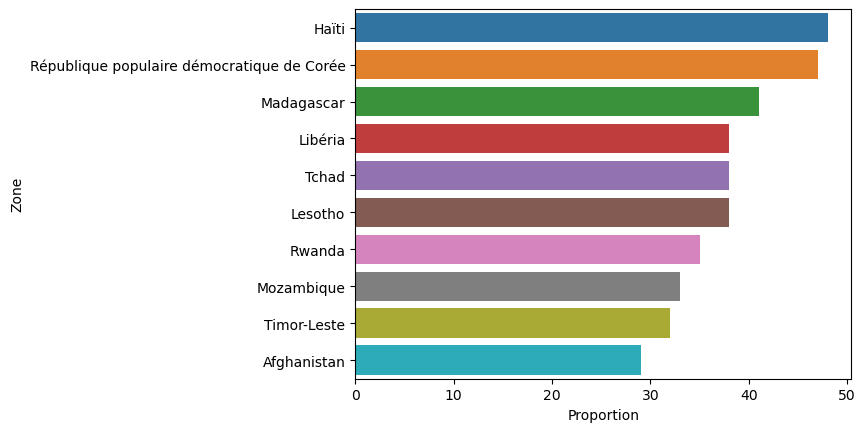

In [69]:
pirePays10 = pirePays10.head(10)
sns.barplot(data=pirePays10,x="Proportion", y="Zone" )

In [70]:
ToppirePays10 = pirePays10["Zone"].iloc[:10]
print(f'Les pires pays sous alimenté sont: {ToppirePays10} ')

Les pires pays sous alimenté sont: 472                                          Haïti
946     République populaire démocratique de Corée
652                                     Madagascar
622                                        Libéria
1102                                         Tchad
604                                        Lesotho
970                                         Rwanda
730                                     Mozambique
1120                                   Timor-Leste
4                                      Afghanistan
Name: Zone, dtype: object 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [71]:
aide_alimentaire.head(10)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
5,Afghanistan,2014,Céréales,15989000
6,Afghanistan,2013,"Fruits secs, total",85000
7,Afghanistan,2013,Huiles végétales,11087000
8,Afghanistan,2014,Huiles végétales,8185000
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761000


In [72]:
#calcul du total de l'aide alimentaire par pays
Total_Zone = aide_alimentaire.groupby("Zone")["Valeur"].sum().reset_index()
Total_Zone.head()


,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [73]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
Top10= Total_Zone.sort_values(by = "Valeur", ascending= False)
Top10.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<Axes: xlabel='Zone', ylabel='Valeur'>

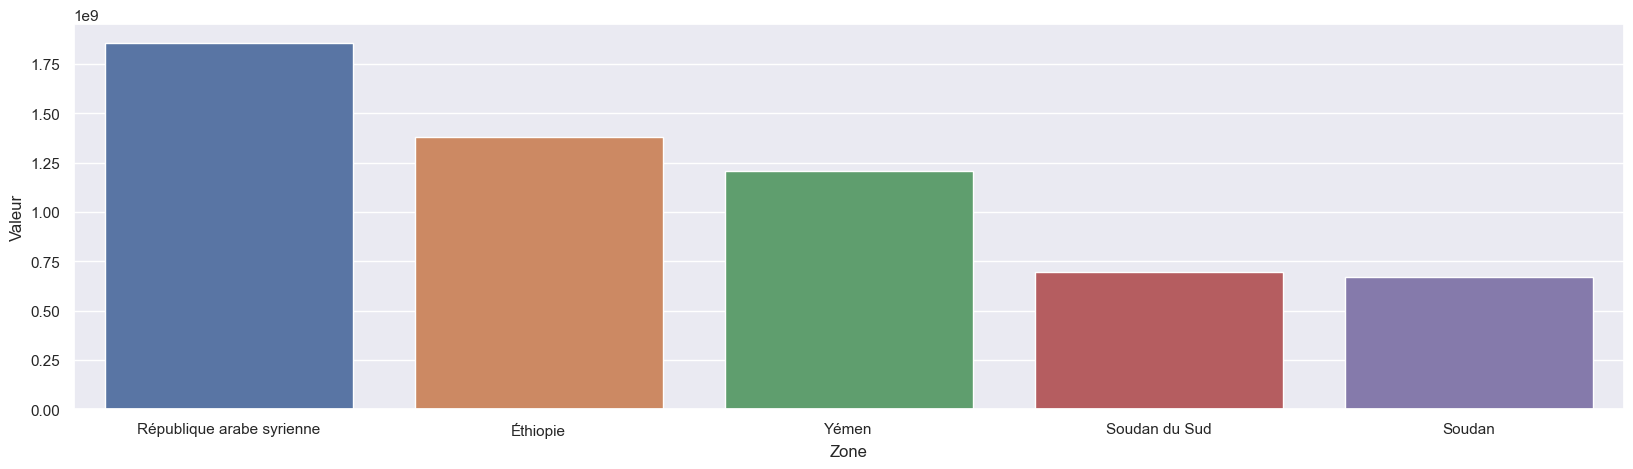

In [141]:
Top10 = Top10.head()
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data =Top10, x ="Zone", y = "Valeur")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [92]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
new_aide_alimentaire = aide_alimentaire[["Zone", "Année", "Valeur"]]
new_aide_alimentaire = new_aide_alimentaire.groupby(["Zone", "Année"]).sum().reset_index()
new_aide_alimentaire

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [118]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
Top5 = new_aide_alimentaire.groupby(["Zone"])["Valeur"].sum().reset_index().sort_values(by ="Valeur", ascending = False).head()
Top5

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000


In [100]:
ListTop5 = Top5["Zone"].to_list()
ListTop5

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [101]:
#On filtre sur le dataframe avec notre liste
def_evo = new_aide_alimentaire[new_aide_alimentaire["Zone"].isin(ListTop5)]
def_evo

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [126]:
# Affichage des pays avec l'aide alimentaire par année


<Axes: xlabel='Année', ylabel='Valeur'>

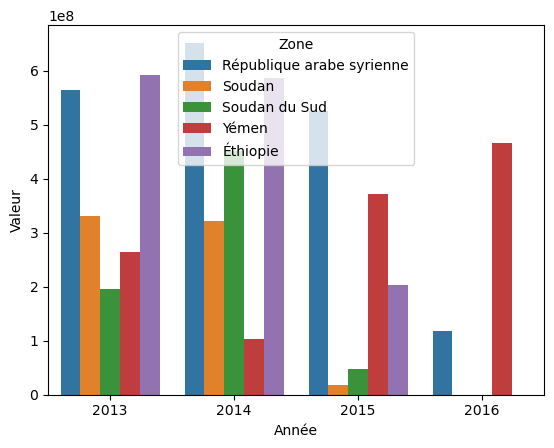

In [102]:
import seaborn as sns
sns.barplot(data=def_evo,x="Année",y="Valeur",hue="Zone")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [80]:
#Calcul de la disponibilité en kcal par personne par jour par pays
DispoAlim_pays = pop_dispoalimentaire.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
DispoAlim_pays

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
167,Émirats arabes unis,3275.0
168,Équateur,2346.0
169,États-Unis d'Amérique,3682.0
170,Éthiopie,2129.0


In [127]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
Pays10_minDispo_alim = DispoAlim_pays.sort_values(by = "Disponibilité alimentaire (Kcal/personne/jour)").head(10)
Pays10_minDispo_alim

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
127,République centrafricaine,1879.0
164,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
132,République populaire démocratique de Corée,2093.0
150,Tchad,2109.0
165,Zimbabwe,2113.0
114,Ouganda,2126.0
152,Timor-Leste,2129.0


<Axes: xlabel='Disponibilité alimentaire (Kcal/personne/jour)', ylabel='Zone'>

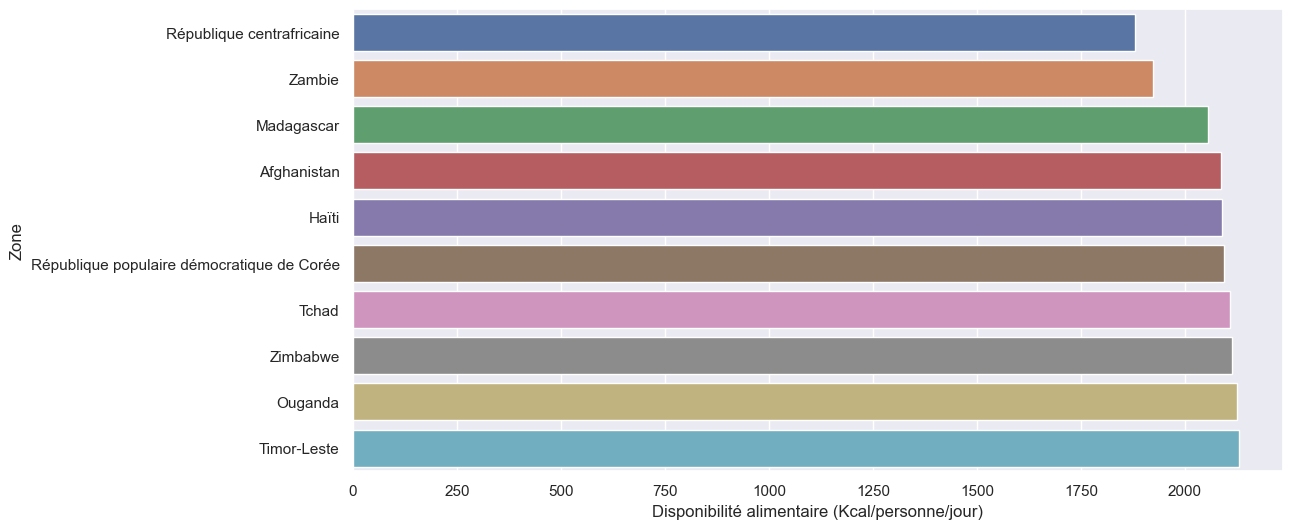

In [134]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data = Pays10_minDispo_alim, y= "Zone", x="Disponibilité alimentaire (Kcal/personne/jour)" )

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [135]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
Top10_dispo_alim = DispoAlim_pays.sort_values(by = "Disponibilité alimentaire (Kcal/personne/jour)", ascending= False).head(10)
Top10_dispo_alim

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
157,Turquie,3708.0
169,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
166,Égypte,3518.0
4,Allemagne,3503.0


<Axes: xlabel='Zone', ylabel='Disponibilité alimentaire (Kcal/personne/jour)'>

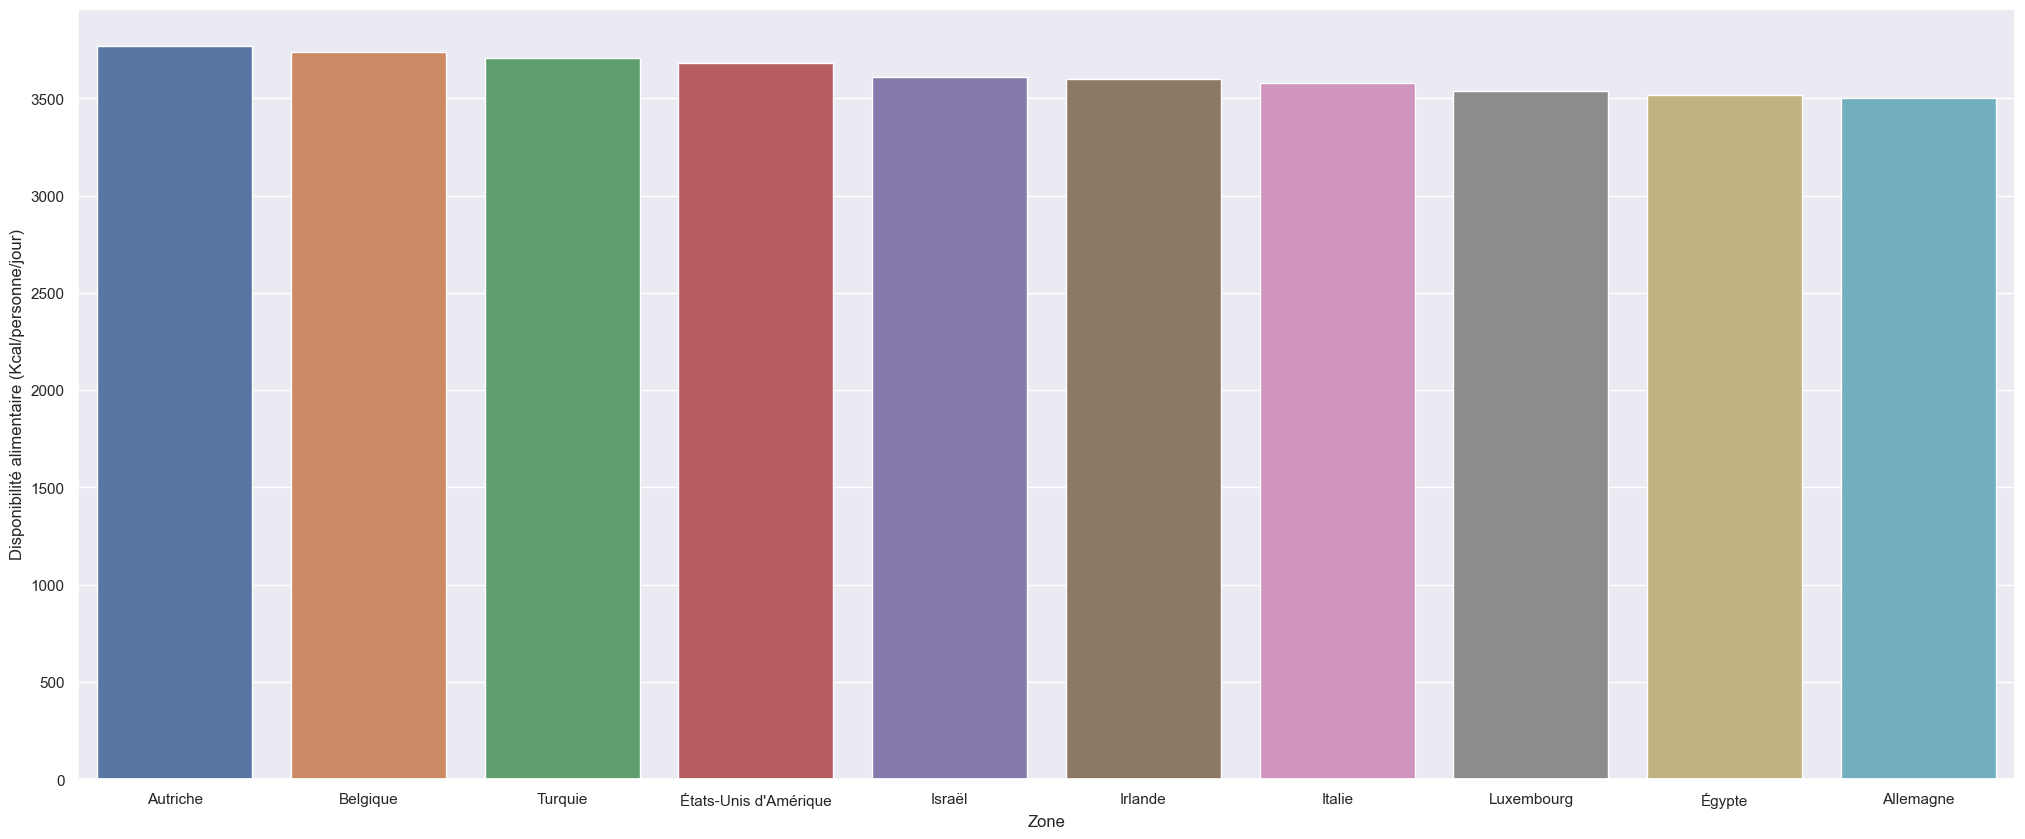

In [139]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data= Top10_dispo_alim, x ="Zone", y = "Disponibilité alimentaire (Kcal/personne/jour)")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [83]:
#création d'un dataframe avec uniquement la Thaïlande 
DF_Thailande = pop_dispoalimentaire[pop_dispoalimentaire["Zone"]=="Thaïlande"]
DF_Thailande

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
14116,Thaïlande,2017,69209810.0,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,...,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,2.076294e+08
14117,Thaïlande,2017,69209810.0,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,...,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,0.000000e+00
14118,Thaïlande,2017,69209810.0,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,...,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,0.000000e+00
14119,Thaïlande,2017,69209810.0,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,...,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,1.384196e+08
14120,Thaïlande,2017,69209810.0,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,...,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,6.920981e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,Thaïlande,2017,69209810.0,Viande de Suides,animale,0.0,0.0,124.0,13.00,11.83,...,871000000.0,2.200000e+07,1000000.0,871000000.0,0.0,8.910000e+08,0.0,0.0,0.0,8.582016e+09
14207,Thaïlande,2017,69209810.0,Viande de Volailles,animale,0.0,0.0,52.0,13.69,3.62,...,945000000.0,5.360000e+08,11000000.0,917000000.0,28000000.0,1.470000e+09,0.0,0.0,0.0,3.598910e+09
14208,Thaïlande,2017,69209810.0,"Viande, Autre",animale,0.0,0.0,0.0,0.03,0.01,...,-92000000.0,9.600000e+07,4000000.0,2000000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
14209,Thaïlande,2017,69209810.0,Vin,vegetale,0.0,0.0,0.0,0.12,0.00,...,8000000.0,8.000000e+06,16000000.0,8000000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [84]:
#Calcul de la sous nutrition en Thaïlande
DF_ThailandeSN = DF_Thailande.merge(sous_nutrition, on =["Année", "Zone"] , how = "inner")
DF_ThailandeSN["Proportion_SousNoutru"] = DF_ThailandeSN["sous_nutrition"]/DF_ThailandeSN["Population"]
DF_ThailandeSN.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal,sous_nutrition,Proportion_SousNoutru
0,Thaïlande,2017,69209810.0,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,...,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,207629430.0,6200000.0,0.089583
1,Thaïlande,2017,69209810.0,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,...,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,0.0,6200000.0,0.089583
2,Thaïlande,2017,69209810.0,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,...,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,0.0,6200000.0,0.089583
3,Thaïlande,2017,69209810.0,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,...,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,138419620.0,6200000.0,0.089583
4,Thaïlande,2017,69209810.0,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,...,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,692098100.0,6200000.0,0.089583


In [85]:
# On calcule la proportion exportée en fonction de la proportion


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [86]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"